# WTTA - Assignment #1 

## Inputs and Data Loading 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bem import steady_bem


# Inputs
R = 89.17       # Radius of rotor [m]
V_0 = 10.0      # Wind speed [m/s]
omega = 8.032   # Angular velocity of rotor [RPM]

# Read txt with blade data
df = pd.read_csv('data/bladedat.txt', sep='\t', names=['r', 'beta', 'c', 'thick'])

# RPM to rad/s
omega = omega*2*np.pi/60

# Question 1

## Wilson & Walker

In [2]:
number_of_theta_p = 40
number_of_lamda = 40

counter = 0
theta_p_list = np.linspace(-3, 4, number_of_theta_p)
lamda_list = np.linspace(5, 10, number_of_lamda)

# Initiliaze 2D matrices
P_out_matrix = np.zeros((number_of_theta_p, number_of_lamda))
Thrust_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_P_matrix_WW = np.zeros((number_of_theta_p, number_of_lamda))
C_T_matrix_WW = np.zeros((number_of_theta_p, number_of_lamda))

for i, theta_p in enumerate(theta_p_list):
    for j, lamda in enumerate(lamda_list):
        omega = lamda*V_0/R
        output_dict_total = steady_bem(R, V_0, omega, theta_p, lamda, df, model='Wilson & Walker', error=1e-6)
        P_out_matrix[i, j] = output_dict_total['P_out']
        Thrust_matrix[i, j] = output_dict_total['Thrust']
        C_P_matrix_WW[i, j] = output_dict_total['C_P']
        C_T_matrix_WW[i, j] = output_dict_total['C_T']

In [3]:
from bem import find_maxes_of_matrix

C_P_max, theta_p_for_C_P_max, lamda_for_C_P_max = find_maxes_of_matrix(C_P_matrix_WW, theta_p_list, lamda_list)

print('Wilson & Walker:')
print(f'Using {number_of_theta_p} theta_ps and {number_of_lamda} lamdas')
print(f'C_P_max = {C_P_max}')
print(f'theta_p_for_C_P_max = {theta_p_for_C_P_max}')
print(f'lamda_for_C_P_max = {lamda_for_C_P_max}')

Wilson & Walker:
Using 40 theta_ps and 40 lamdas
C_P_max = 0.5265740181612488
theta_p_for_C_P_max = -2.282051282051282
lamda_for_C_P_max = 8.717948717948717


In [4]:
C_T_max, theta_p_for_C_T_max, lamda_for_C_T_max = find_maxes_of_matrix(C_T_matrix_WW, theta_p_list, lamda_list)

print('Wilson & Walker:')
print(f'Using {number_of_theta_p} theta_ps and {number_of_lamda} lamdas')
print(f'C_T_max = {C_T_max}')
print(f'theta_p_for_C_T_max = {theta_p_for_C_T_max}')
print(f'lamda_for_C_T_max = {lamda_for_C_T_max}')

Wilson & Walker:
Using 40 theta_ps and 40 lamdas
C_T_max = 1.3217997947144111
theta_p_for_C_T_max = -3.0
lamda_for_C_T_max = 10.0


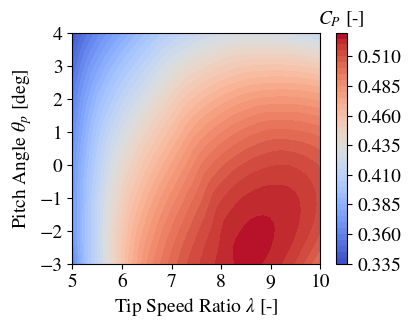

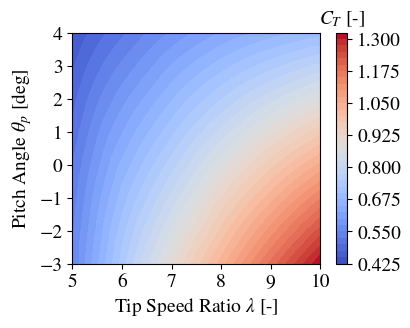

In [15]:
plt.style.use("stylesheet_contourf.mplstyle")

X, Y = np.meshgrid(lamda_list, theta_p_list)

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_P_matrix_WW, levels=number_of_theta_p, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
cbar = fig.colorbar(cp)
cbar.ax.set_title(r'$C_P$ [-]', size = 14)
# ax.set_title(r'$C_{P}(\lambda,\theta_{p})$ [-]')
ax.set_xlabel(r'Tip Speed Ratio $\lambda$ [-]')
ax.set_ylabel(r'Pitch Angle $\theta_p$ [deg]')
cbar.ax.locator_params(nbins=8)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=8) 
plt.show()
fig.savefig('plots/Q1_WW_CP' + '.png', dpi=300, bbox_inches='tight')



fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_T_matrix_WW, levels=number_of_theta_p, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
cbar = fig.colorbar(cp)
cbar.ax.set_title(r'$C_T$ [-]', size = 14)
# ax.set_title(r'$C_{T}(\lambda,\theta_{p})$ [-]')
ax.set_xlabel(r'Tip Speed Ratio $\lambda$ [-]')
ax.set_ylabel(r'Pitch Angle $\theta_p$ [deg]')
cbar.ax.locator_params(nbins=8)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=8) 
plt.show()
fig.savefig('plots/Q1_WW_CT' + '.png', dpi=300, bbox_inches='tight')

## Glauret

In [8]:
number_of_theta_p = 40
number_of_lamda = 40

counter = 0
theta_p_list = np.linspace(-3, 4, number_of_theta_p)
lamda_list = np.linspace(5, 10, number_of_lamda)

# Initiliaze 2D matrices
P_out_matrix = np.zeros((number_of_theta_p, number_of_lamda))
Thrust_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_P_matrix = np.zeros((number_of_theta_p, number_of_lamda))
C_T_matrix = np.zeros((number_of_theta_p, number_of_lamda))

for i, theta_p in enumerate(theta_p_list):
    for j, lamda in enumerate(lamda_list):
        omega = lamda*V_0/R
        output_dict_total = steady_bem(R, V_0, omega, theta_p, lamda, df, model='Glauret', error=1e-6)
        P_out_matrix[i, j] = output_dict_total['P_out']
        Thrust_matrix[i, j] = output_dict_total['Thrust']
        C_P_matrix[i, j] = output_dict_total['C_P']
        C_T_matrix[i, j] = output_dict_total['C_T']

In [9]:
from bem import find_maxes_of_matrix

C_P_max, theta_p_for_C_P_max, lamda_for_C_P_max = find_maxes_of_matrix(C_P_matrix, theta_p_list, lamda_list)

print('Glauret:')
print(f'Using {number_of_theta_p} theta_ps and {number_of_lamda} lamdas')
print(f'C_P_max = {C_P_max}')
print(f'theta_p_for_C_P_max = {theta_p_for_C_P_max}')
print(f'lamda_for_C_P_max = {lamda_for_C_P_max}')

Glauret:
Using 40 theta_ps and 40 lamdas
C_P_max = 0.46619198239477433
theta_p_for_C_P_max = 0.0512820512820511
lamda_for_C_P_max = 7.948717948717949


In [10]:
C_T_max, theta_p_for_C_T_max, lamda_for_C_T_max = find_maxes_of_matrix(C_T_matrix, theta_p_list, lamda_list)

print('Glauret:')
print(f'Using {number_of_theta_p} theta_ps and {number_of_lamda} lamdas')
print(f'C_T_max = {C_T_max}')
print(f'theta_p_for_C_T_max = {theta_p_for_C_T_max}')
print(f'lamda_for_C_T_max = {lamda_for_C_T_max}')

Glauret:
Using 40 theta_ps and 40 lamdas
C_T_max = 1.205859631933604
theta_p_for_C_T_max = -3.0
lamda_for_C_T_max = 10.0


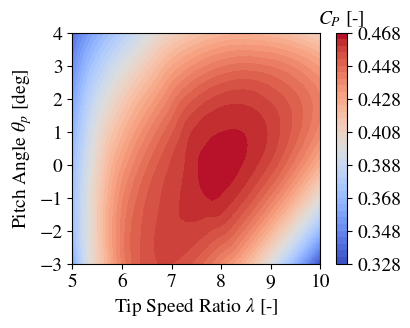

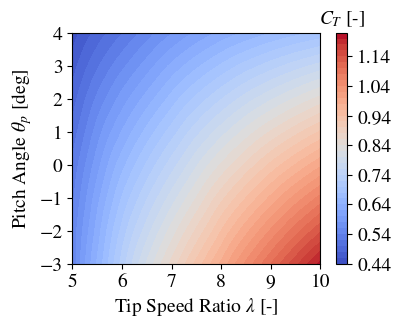

In [19]:
plt.style.use("stylesheet_contourf.mplstyle")

X, Y = np.meshgrid(lamda_list, theta_p_list)

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_P_matrix, levels=number_of_theta_p, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
cbar = fig.colorbar(cp)
cbar.ax.set_title(r'$C_P$ [-]', size=14)
ax.set_xlabel(r'Tip Speed Ratio $\lambda$ [-]')
ax.set_ylabel(r'Pitch Angle $\theta_p$ [deg]')
cbar.ax.locator_params(nbins=8)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=8) 
plt.show()
fig.savefig('plots/Q1_Glauret_CP' + '.png', dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, C_T_matrix, levels=number_of_theta_p, cmap='coolwarm')  # Should we add vmin=0.3, vmax=0.5 ??
cbar = fig.colorbar(cp)
cbar.ax.set_title(r'$C_T$ [-]', size=14)
ax.set_xlabel(r'Tip Speed Ratio $\lambda$ [-]')
ax.set_ylabel(r'Pitch Angle $\theta_p$ [deg]')
cbar.ax.locator_params(nbins=8)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=8) 
plt.show()
fig.savefig('plots/Q1_Glauret_CT' + '.png', dpi=300, bbox_inches='tight')

# Results we should be getting for Q1

|      | $C_P$ | $\lambda$ | $\theta_p$ |
|------|-----------|---------|-----------|
| Old  | 0.466     | 7.105   | 1.053     |
| New  | 0.466     | 7.949   | 0.051     |
| Prof | 0.466     | 8       | 0         |


# Question 2

In [23]:
import numpy as np
import pandas as pd
from bem import steady_bem_for_each_airfoil

# In case we need to run only Q2:
theta_p_for_C_P_max = 0.0512820512820511
lamda_for_C_P_max = 7.948717948717949

# Number of chords to test
number_of_c = 100

# Get dict for airfoil at r = 71.97 m 
df = pd.read_csv('data/bladedat.txt', sep='\t', names=['r', 'beta', 'c', 'thick'])
airfoil = df[df['r'].between(71, 73)].to_dict('records')[0]

# Get 'aoa' of airfoil at r = 71.97 m for values of 'theta_p' and 'lamda' that give 'C_P_max'
original_dict = steady_bem_for_each_airfoil(R, V_0, omega, theta_p_for_C_P_max, lamda_for_C_P_max, airfoil)
aoa_for_C_P_max = original_dict['aoa']

# Initiliaze arrays
c_arr = np.linspace(0, 3, number_of_c)
C_P_local_arr = np.zeros(number_of_c)
beta_arr = np.zeros(number_of_c)

# Use the 'aoa_for_C_P_max' 
for i, c in enumerate(c_arr):
    airfoil['c'] = c
    local_dict_2 = steady_bem_for_each_airfoil(R, V_0, omega, theta_p_for_C_P_max, lamda_for_C_P_max, airfoil, aoa=aoa_for_C_P_max)
    C_P_local_arr[i] = local_dict_2['C_P_local']
    beta_arr[i] = local_dict_2['beta']

# Print results
idx = np.argmax(C_P_local_arr)
print(f'           {"C_P_local":^10}{"beta":^10}{"c":^10}')
print(f'Original:  {original_dict["C_P_local"]:<10.5f}{"-1.11":<10}{"2.91":<10}')
print(f'Optimized: {C_P_local_arr[idx]:<10.5f}{beta_arr[idx]:<10.5f}{c_arr[idx]:<10.5f}')

           C_P_local    beta       c     
Original:  0.35795   -1.11     2.91      
Optimized: 0.40170   0.01001   2.33333   


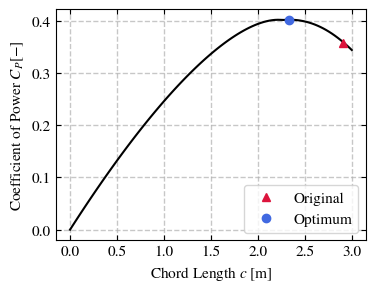

In [53]:
plt.style.use("stylesheet_Q2.mplstyle")

fig, ax = plt.subplots(1, 1)
ax.plot(c_arr, C_P_local_arr, 'k')
plt.xlabel(r'Chord Length $c$ [m]')
plt.ylabel(r'Coefficient of Power $C_{P} [-]$')
plt.plot(2.91, 0.35795, '^', c='crimson', label = 'Original')
plt.plot(c_arr[idx], C_P_local_arr[idx], 'o', c='royalblue', label = 'Optimum')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.locator_params(axis='x', nbins=7)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc='lower right')
plt.show()
fig.savefig('plots/Q2' + '.pdf', dpi=300, bbox_inches='tight')

# Q3

In [67]:
P_mech = 10.64 * 1e6
A = np.pi*R**2
RHO = 1.225     # Air density [kg/m^3]

V_0_rated = (2*P_mech/(RHO*A*C_P_max))**(1/3)
omega_max = V_0_rated*lamda_for_C_P_max/R
print(f'V_0_rated = {V_0_rated}')
print(omega_max, 'rad/s')
print(omega_max*60/(2*np.pi), 'RPM') 

V_0_rated = 11.426005871822943
1.0185275087531198 rad/s
9.726221261587963 RPM


## It might have to start at V_0=cut_in_speed, V_0=cut_out_speed ???

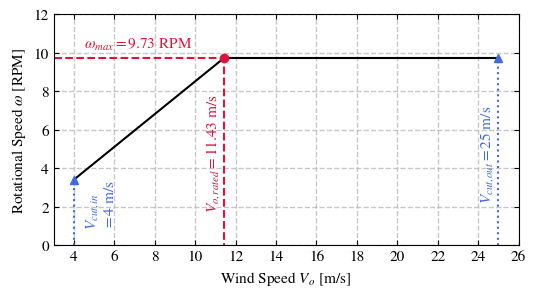

In [231]:
plt.style.use("stylesheet_Q3.mplstyle")

V_0_arr= np.linspace(4,V_0_rated,100)
omega_arr = lamda_for_C_P_max*V_0_arr/R *60/(2*np.pi)

# For values greater than 25
x_values = [V_0_rated, 25]
y_values = [omega_max*60/(2*np.pi), omega_max*60/(2*np.pi)]

fig, ax = plt.subplots(1, 1)
ax.plot(V_0_arr, omega_arr, c='black')
ax.plot(x_values, y_values, c='black')

# Rated point lines
ax.plot([0, V_0_rated], y_values, '--', c='crimson')
ax.plot([V_0_rated, V_0_rated], [-2, omega_arr[-1]], 'o--', c='crimson')
ax.text(V_0_rated-1, 2, '$V_{o,rated} = 11.43$ m/s', c='crimson', rotation=90)
ax.text(4.5, omega_arr[-1]+0.5, '$\omega_{max} = 9.73$ RPM', c='crimson', rotation=0)

# Cut-in and Cut-out
ax.plot([4, 4], [-2, omega_arr[0]], '^:', c='royalblue')
ax.plot([25, 25], [-2, omega_arr[-1]], '^:', c='royalblue')
ax.text(4.5, 1, '$V_{cut,in}$\n$=4$ m/s', c='royalblue', rotation=90)
ax.text(24, 2.5, '$V_{cut,out}=25$ m/s', c='royalblue', rotation=90)

plt.xlabel('Wind Speed $V_o$ [m/s] ')
plt.ylabel('Rotational Speed $\omega$ [RPM]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
# plt.locator_params(axis='x', nbins=7)
# plt.locator_params(axis='y', nbins=5)
plt.xlim(3, 26)
plt.ylim(3, 11)
plt.xticks(np.arange(4, 27, 2))
plt.yticks([0, 2, 4, 6, 8, 10, 12])
plt.show()
fig.savefig('plots/Q3' + '.pdf', dpi=300, bbox_inches='tight')

In [65]:
omega_max

1.0185275087531198

# Q4

In [221]:
number_of_theta_p = 500
number_of_V_0 = 500

counter = 0
theta_p_list = np.linspace(0, 25, number_of_theta_p)
V_0_list = np.linspace(4, 25, number_of_V_0) # Cut-in and cut-out wind speed

theta_rated = np.zeros(number_of_V_0)
P_out_rated = np.zeros(number_of_V_0)
Thrust_rated = np.zeros(number_of_V_0)
C_P_rated = np.zeros(number_of_V_0)
C_T_rated = np.zeros(number_of_V_0)

for i, V_0_q4 in enumerate(V_0_list):
    # If V_0 <= V_0_rated use theta_p_for_C_P_max, lamda_for_C_P_max
    if V_0_q4 <= V_0_rated:
        omega = V_0_q4*lamda_for_C_P_max/R
        output_rated_dict = steady_bem(R, V_0_q4, omega, theta_p_for_C_P_max, lamda_for_C_P_max, df)
        P_out_rated[i] = output_rated_dict['P_out']
        Thrust_rated[i] = output_rated_dict['Thrust']
        C_P_rated[i] = output_rated_dict['C_P']
        C_T_rated[i] = output_rated_dict['C_T']
    else:
        # If V_0 > V_0_rated start pitching
        for j, theta_p in enumerate(theta_p_list):
            lamda = omega_max*R/V_0_q4
            output_rated_dict = steady_bem(R, V_0_q4, omega_max, theta_p, lamda, df)
            if output_rated_dict['P_out'] >= 10.64 * 1e3:
                theta_rated[i] = theta_p
                P_out_rated[i] = output_rated_dict['P_out']
                Thrust_rated[i] = output_rated_dict['Thrust']
                C_P_rated[i] = output_rated_dict['C_P']
                C_T_rated[i] = output_rated_dict['C_T']
                continue

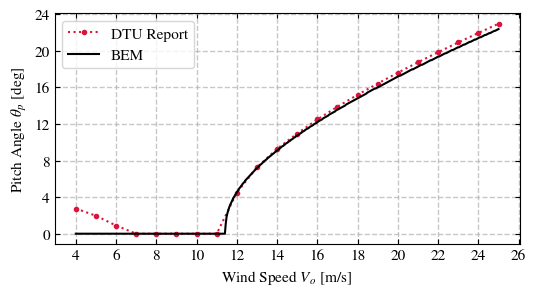

In [222]:
plt.style.use("stylesheet_Q3.mplstyle")
theta_dtu_report = [2.751, 1.966, 0.896, 0.000, 0.000, 0.000, 0.000, 0.000, 4.502, 7.266, 9.292, 10.958, 12.499, 13.896, 15.200, 16.432, 17.618, 18.758, 19.860, 20.927, 21.963, 22.975]
V_0_dtu_report = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]


fig, ax = plt.subplots(1, 1)
ax.plot(V_0_dtu_report, theta_dtu_report, '.:', color='crimson', label='DTU Report')
ax.plot(V_0_list, theta_rated, '-', color='black', label='BEM')
# plt.vlines(x=V_0_rated, ymin=0, ymax=10)
plt.xlabel('Wind Speed $V_o$ [m/s] ')
plt.ylabel('Pitch Angle $\\theta_{p}$ [deg]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
# plt.xlim(3, 26)
# plt.ylim(3, 11)
plt.xticks(np.arange(4, 27, 2))
plt.yticks(np.arange(0, 25, 4))
plt.legend(loc='upper left')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.show()
fig.savefig('plots/Q4_theta' + '.pdf', dpi=300, bbox_inches='tight')

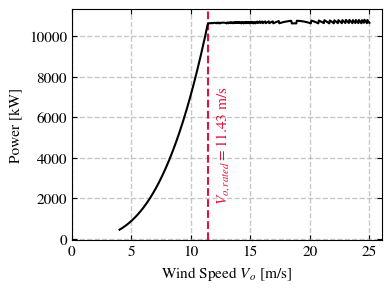

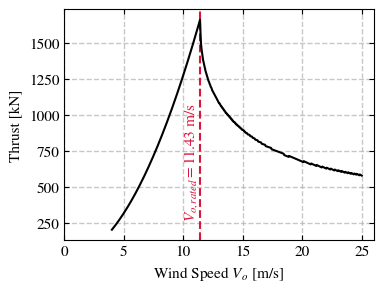

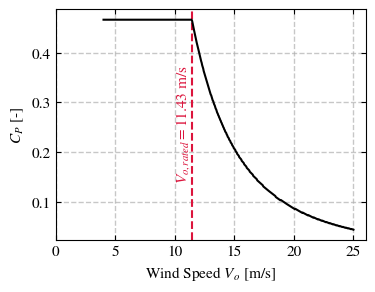

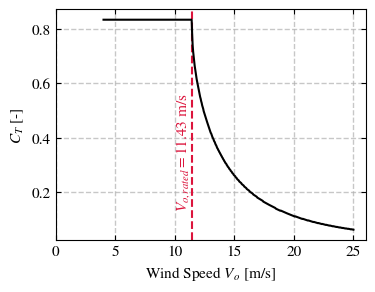

In [223]:
plt.style.use("stylesheet_Q5.mplstyle")

fig, ax = plt.subplots(1, 1)
ax.axvline(x=V_0_rated, color='crimson', linestyle='--')
ax.text(V_0_rated+0.5, 2000, '$V_{o,rated} = 11.43$ m/s', c='crimson', rotation=90)
ax.plot(V_0_list, P_out_rated, color = 'black')   # Be carefull of W vs MW etc.
plt.xlabel('Wind Speed $V_o$ [m/s] ')
plt.ylabel('Power [kW]')
plt.xticks(np.arange(0, 27, 5))
# plt.yticks(np.arange(0, 25, 4))
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')

plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.show()
fig.savefig('plots/Q4_Power' + '.pdf', dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(1, 1)
ax.axvline(x=V_0_rated, color='crimson', linestyle='--')
ax.text(V_0_rated-1.5, 300, '$V_{o,rated} = 11.43$ m/s', c='crimson', rotation=90)
ax.plot(V_0_list, Thrust_rated, color = 'black')
# plt.vlines(x=V_0_rated, ymin=0, ymax=10)
plt.xlabel('Wind Speed $V_o$ [m/s] ')
plt.ylabel('Thrust [kN]')
plt.xticks(np.arange(0, 27, 5))
# plt.yticks(np.arange(0, 25, 4))
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.show()
fig.savefig('plots/Q4_Thrust' + '.pdf', dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(1, 1)
ax.axvline(x=V_0_rated, color='crimson', linestyle='--')
ax.text(V_0_rated-1.5, 0.15, '$V_{o,rated} = 11.43$ m/s', c='crimson', rotation=90)
ax.plot(V_0_list, C_P_rated, color = 'black')
# plt.vlines(x=V_0_rated, ymin=0, ymax=0.4)
plt.xlabel('Wind Speed $V_o$ [m/s] ')
plt.ylabel('$C_{P}$ [-]')
plt.xticks(np.arange(0, 27, 5))
# plt.yticks(np.arange(0, 25, 4))
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.show()
fig.savefig('plots/Q4_CP' + '.pdf', dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(1, 1)
ax.axvline(x=V_0_rated, color='crimson', linestyle='--')
ax.text(V_0_rated-1.5, 0.15, '$V_{o,rated} = 11.43$ m/s', c='crimson', rotation=90)
ax.plot(V_0_list, C_T_rated, color = 'black')
# plt.vlines(x=V_0_rated, ymin=0, ymax=0.4)
plt.xlabel('Wind Speed $V_o$ [m/s] ')
plt.ylabel('$C_{T}$ [-]')
plt.xticks(np.arange(0, 27, 5))
# plt.yticks(np.arange(0, 25, 4))
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=1, alpha=0.7)
plt.show()
fig.savefig('plots/Q4_CT' + '.pdf', dpi=300, bbox_inches='tight')




# Question 5 (DONT RUN THIS)

In [ ]:
# number_of_theta_p = 150

# counter = 0
# theta_p_list = np.linspace(0, 25, number_of_theta_p)
# V_0_q5_list = np.array([5, 9, 11, 20])
# number_of_V_0 = len(V_0_q5_list)

# omega_rated = np.zeros(number_of_V_0)
# theta_rated = np.zeros(number_of_V_0)

# P_out_rated = np.zeros(number_of_V_0)
# Thrust_rated = np.zeros(number_of_V_0)
# C_P_rated = np.zeros(number_of_V_0)
# C_T_rated = np.zeros(number_of_V_0)

# C_P_local_q5_list = []
# C_T_local_q5_list = []

# for i, V_0_q5 in enumerate(V_0_q5_list):
#     # If V_0 <= V_0_rated use theta_p_for_C_P_max, lamda_for_C_P_max
#     if V_0_q5 <= V_0_rated:
#         omega = V_0_q5*lamda_for_C_P_max/R
#         output_q5_dict = steady_bem(R, V_0_q5, omega, theta_p_for_C_P_max, lamda_for_C_P_max, df)
#         omega_rated[i] = omega
#         theta_rated[i] = theta_p_for_C_P_max

#         P_out_rated[i] = output_q5_dict['P_out']
#         Thrust_rated[i] = output_q5_dict['Thrust']
#         C_P_rated[i] = output_q5_dict['C_P']
#         C_T_rated[i] = output_q5_dict['C_T']
#         C_P_local_q5_list.append(output_q5_dict['C_P_local_arr'])
#         C_T_local_q5_list.append(output_q5_dict['C_T_local_arr'])
#     else:
#         # If V_0 > V_0_rated start pitching
#         for j, theta_p in enumerate(theta_p_list):
#             lamda = omega_max*R/V_0_q5
#             output_q5_dict = steady_bem(R, V_0_q5, omega_max, theta_p, lamda, df)
#             if output_q5_dict['P_out'] >= 10.64 * 1e3:
#                 omega_rated[i] = omega_max
#                 theta_rated[i] = theta_p
#                 P_out_rated[i] = output_q5_dict['P_out']
#                 Thrust_rated[i] = output_q5_dict['Thrust']
#                 C_P_rated[i] = output_q5_dict['C_P']
#                 C_T_rated[i] = output_q5_dict['C_T']
#                 C_P_local_q5_list.append(output_q5_dict['C_P_local_arr'])
#                 C_T_local_q5_list.append(output_q5_dict['C_T_local_arr'])
#                 continue

# # rad/s -> rpm
# omega_rated = omega_rated*60/(2*np.pi)

In [ ]:
# # omega_rated = omega_rated*60/(2*np.pi)
# print('V_0 \t omega \t\t\t theta \t\t\t C_P \t\t\t C_T \t\t\t P_out \t\t\t Thrust')
# for i in range(4):
#     print(V_0_list[i], '\t', omega_rated[i], '\t', theta_rated[i], '\t', C_P_rated[i], '\t', C_T_rated[i], '\t', P_out_rated[i], '\t', Thrust_rated[i])

In [ ]:
# df_q5 = pd.DataFrame({
#     'V_0': V_0_list,
#     'omega': omega_rated,
#     'theta': theta_rated,
#     'C_P': C_P_rated,
#     'C_T': C_T_rated,
#     'P_out': P_out_rated,
#     'Thrust': Thrust_rated
#     # 'C_P_local_arr': C_P_local_q5_list,
#     # 'C_T_local_arr': C_T_local_q5_list
# })
# df_q5.to_excel('Q5_BEM_results.xlsx')

## Read and Save Ashes data

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# for speed in [5, 9, 11, 20]:
#     df_ashes = pd.read_table(
#         f"ashes/Speed_{speed}/Sensor Rotor.txt",
#         delimiter='\t',
#         usecols=["Time [s]", "Power (aero) [k W]", "Torque (aero) [k Nm]", "Thrust (aero) [k N]", "Power coef. (CP) [%]", "Thrust coef. (CT) [%]"],
#         skiprows=11
#     )
#     df_ashes = df_ashes.rename(columns={
#         'Time [s]': 'Time',
#         'Power (aero) [k W]': 'Power',
#         'Torque (aero) [k Nm]': 'Torque',
#         'Thrust (aero) [k N]': 'Thrust',
#         'Power coef. (CP) [%]': 'CP',
#         'Thrust coef. (CT) [%]': 'CT',
#     })

#     # Drop the first 7 rows with the MEAN etc.
#     df_ashes.iloc[1:5].to_excel(f'Speed_{speed}_Ashes_Mean.xlsx')

# Q6 (Modify Sevi)

In [227]:
print('V_0_list [m/s]:', len(V_0_list), V_0_list[0], V_0_list[-1])
print('P_out_rated [kW]:', len(P_out_rated), P_out_rated[0], P_out_rated[-1])

V_0_list [m/s]: 500 4.0 25.0
P_out_rated [kW] 500 456.4973630871615 10664.454111715906


In [230]:
k = 1.9
A = 9

aeo_25 = 0
aeo_20 = 0

for i in range(len(V_0_list)-1):
    v0 = V_0_list[i]
    v1 = V_0_list[i+1]
    f = np.exp(-(v0/A)**k)-np.exp(-(v1/A)**k)

    aeo_25 += 1/2 *(P_out_rated[i]+P_out_rated[i+1])*8760*f
    if V_0_list[i+1] <= 20:
        aeo_20 += 1/2 *(P_out_rated[i]+P_out_rated[i+1])*8760*f

print('The Anual Energy Production if the turbine is stopped at 25 m/s equals {:.2f} [MWh]'.format(aeo_25/1000))
print('The Anual Energy Production if the turbine is stopped at 20 m/s equals {:.2f} [MWh]'.format(aeo_20/1000))
print('The lost in Anual Energy Production equals {:.2f} [MWh]'.format((aeo_25-aeo_20)/1000))

The Anual Energy Production if the turbine is stopped at 25 m/s equals 38423.39 [MWh]
The Anual Energy Production if the turbine is stopped at 20 m/s equals 37525.23 [MWh]
The lost in Anual Energy Production equals 898.16 [MWh]
